In [3]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

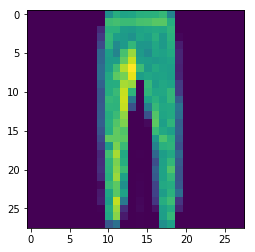

In [7]:
import matplotlib.pyplot as plt
images,label = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze())

In [9]:
#building a network
from torch import nn,optim
import torch.nn.functional as F

In [10]:
model = nn.Sequential(
                    nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1)
)
#defining the loss
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

In [12]:
model
%config IPCompleter.greedy=True

In [14]:
#training the network
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1)
        output = model(images)
        loss = criterion(output,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+= loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
#after the completion of the for loop it goes to the else block

Training loss: 0.5013802529080336
Training loss: 0.3856514115005668
Training loss: 0.3525104767509869
Training loss: 0.3313788785132518
Training loss: 0.314835078648921


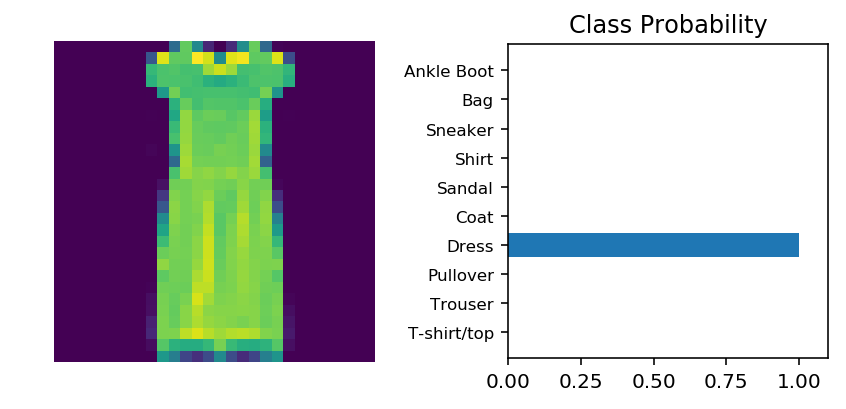

In [16]:
#plotting the results
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

dataiter = iter(testloader)
images,labels = dataiter.next()
img = images[0]

img = img.view(img.shape[0],-1)
#as we used log soft max so the porbability calculation
ps = torch.exp(model(img))
helper.view_classify(img, ps, version='Fashion')